# Neural Network-Training And Evaluation

In [7]:
# Importing the packages

import tensorflow as tf
import keras
import keras.models as M
import keras.layers as L
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


Shape of the training data: (50000, 32, 32, 3) (50000, 1)
Shape of the testing data: (10000, 32, 32, 3) (10000, 1)


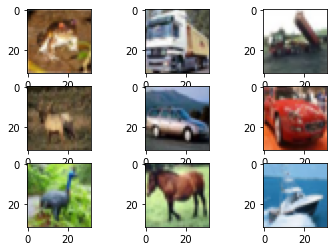

In [5]:
# Loading the dataset

(trainX, trainy), (testX, testy) = cifar10.load_data()

# Having some info on the dataset
print("Shape of the training data:",trainX.shape,trainy.shape)
print("Shape of the testing data:",testX.shape,testy.shape)

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i])
# show the figure
plt.show()

In [9]:
# Converting the data to categorical values for the model by one hot encoding them

trainY = to_categorical(trainy)
testY = to_categorical(testy)

# Settings for every model

In [50]:
epochs = 50

def make_visualization(model):
  plt.plot([i for i in range(0,epochs)],model.history.history['acc'],label="Training accuracy")
  plt.plot([i for i in range(0,epochs)],model.history.history['val_acc'],label="Validation accuracy")
  plt.legend(loc="upper left")
  plt.show()

# NetA model

In [38]:
def make_netA_model():
  input1 = M.Input(shape=(32,32,3))
  flatten = L.Flatten()(input1)
  dense = L.Dense(10,activation='softmax')(flatten)

  model = M.Model(inputs=input1,outputs=dense)

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

  return model

In [39]:
netA = make_netA_model()

In [40]:
netA.fit(trainX,trainY,epochs=epochs,validation_data=(testX,testY))

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 120.3226 - acc: 0.2152 - val_loss: 148.3727 - val_acc: 0.2317
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 84.2006 - acc: 0.2586 - val_loss: 113.9992 - val_acc: 0.2296
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 84.1017 - acc: 0.2706 - val_loss: 79.9350 - val_acc: 0.2644
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 85.9051 - acc: 0.2679 - val_loss: 77.4252 - val_acc: 0.2648
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 85.6217 - acc: 0.2748 - val_loss: 66.1455 - val_acc: 0.2856
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 80.9685 - acc: 0.2782 - val_loss: 99.5752 - val_acc: 0.2048
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 82.8561 - acc: 0.2795 - val_loss: 120.5760 - val_acc: 0.2321
Epoch 8/50
1563/1563 [======================

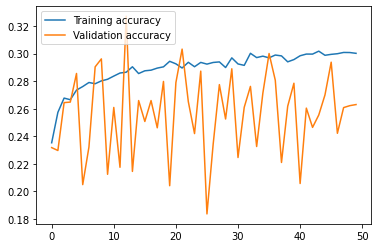

In [51]:
make_visualization(netA)

# Making NetB Model

In [52]:
def make_netB_model():
  input2 = M.Input(shape=(32,32,3))
  flatten = L.Flatten()(input2)
  hidden1 = L.Dense(300,activation='relu')(flatten)
  dense_output = L.Dense(10,'softmax')(hidden1)

  # Making the model
  model = M.Model(inputs = input2,outputs=dense_output)

  # Compiling the model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

  # Returning the model
  return model

In [53]:
netB=make_netB_model()

In [54]:
# Fitting the netB model
netB.fit(trainX,trainY,epochs=epochs,validation_data=(testX,testY))

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 80.7878 - acc: 0.1538 - val_loss: 2.3034 - val_acc: 0.1003
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - acc: 0.1011 - val_loss: 2.3023 - val_acc: 0.1002
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3026 - acc: 0.0997 - val_loss: 2.3024 - val_acc: 0.1002
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3024 - acc: 0.1005 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3025 - acc: 0.1007 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3027 - acc: 0.1015 - val_loss: 2.3027 - val_acc: 0.1001
Epoch 8/50
1563/1563 [==============================] - 4s 3m

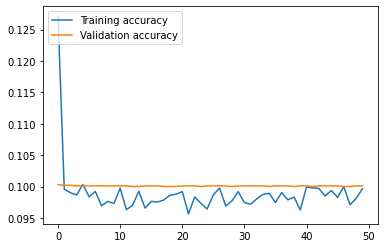

In [55]:
make_visualization(netB)

# Making the NetC Model

In [56]:
def make_netC_model():
  input3 = M.Input(shape=(32,32,3))
  conv1 = L.Conv2D(filters=25,kernel_size=(5,5),activation='relu')(input3)
  maxpooling = L.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv1)
  flatten = L.Flatten()(maxpooling)
  dense_output=L.Dense(10,'softmax')(flatten)
  # Making the model
  model = M.Model(inputs = input3,outputs=dense_output)

  # Compiling the model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

  # Returning the model
  return model

In [57]:
netC = make_netC_model()

In [58]:
# Fitting the netC model
netC.fit(trainX,trainY,epochs=epochs,validation_data=(testX,testY))

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 8.6282 - acc: 0.1394 - val_loss: 2.1594 - val_acc: 0.2102
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1699 - acc: 0.2047 - val_loss: 2.0971 - val_acc: 0.2409
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0940 - acc: 0.2371 - val_loss: 2.2207 - val_acc: 0.2543
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0300 - acc: 0.2630 - val_loss: 2.0829 - val_acc: 0.2591
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0155 - acc: 0.2616 - val_loss: 2.1398 - val_acc: 0.2082
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9746 - acc: 0.2779 - val_loss: 2.0920 - val_acc: 0.2637
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9450 - acc: 0.2895 - val_loss: 2.1217 - val_acc: 0.2442
Epoch 8/50
1563/1563 [==============================] - 5s 3ms

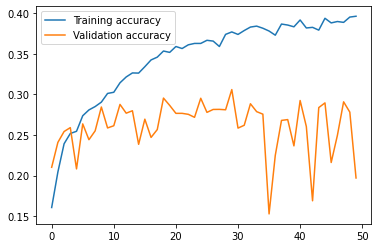

In [59]:
make_visualization(netC)